# Tugas Data Visualization 4

* Silakan download dan kerjakan soal berikut dimanapun (laptop pribadi/google colab/etc.)
* Setelah selesai mengerjakan, upload file ini di tempat yang telah disediakan pada platform.
* Beri nama file seperti berikut: {username}-dataviz-4.ipynb
* Contoh: johndoe-ab12-dataviz-4.ipynb
* Tutorial: https://discourse.pacmann.ai/t/pengumuman-seluruh-platform-pacmann-ai/409
* Username dapat dilihat di dalam akun anda.
* Mohon jangan mengubah nama variabel yang telah diberikan.
* Namun anda diperbolehkan untuk menambah variabel apapun.
---

# Pendahuluan

Seperti yang telah dipelajari di dalam kelas, dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import data -- Silakan diganti jika Anda bekerja di direktori lain
house = pd.read_csv('data/train_house.csv', index_col=0)
print('Jumlah variabel =', len(house.columns))

Jumlah variabel = 80


Seperti yang dapat diamati, terdapat 80 variabel dalam dataset ini. Untuk itu, kita harus mengetahui makna dari tiap-tiap variabel tersebut supaya kita dapat memilih variabel mana saja yang akan kita pakai dalam analisis kita.

Deskripsi lengkap dari seluruh variabel yang ada dapat dilihat dari [penyedia data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) pada bagian data description.

In [3]:
# Drop variabel NaN -- jangan diganti!
house = house.dropna(axis=1)

In [4]:
# Memisahkan data menjadi numerikal & kategorikal -- jangan diganti!
num_cols = house._get_numeric_data().columns
house_numerical = house[num_cols]
house_categorical = house.drop(num_cols, axis = 1)

In [5]:
house_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0


In [6]:
house_categorical.describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

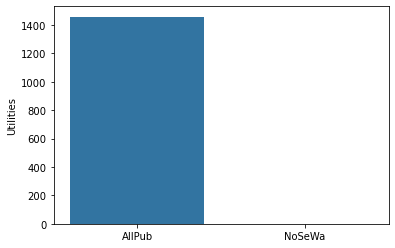

In [7]:
### Tulis kode Anda di sini

sns.barplot(x=house_categorical.Utilities.value_counts().index,
            y=house_categorical.Utilities.value_counts())
plt.show()

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

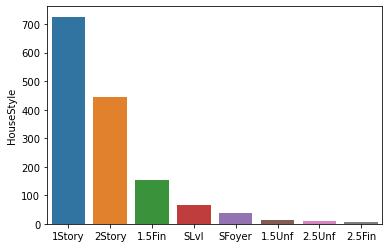

In [8]:
### Tulis kode Anda di sini

sns.barplot(x=house_categorical.HouseStyle.value_counts().index,
            y=house_categorical.HouseStyle.value_counts())
plt.show()

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

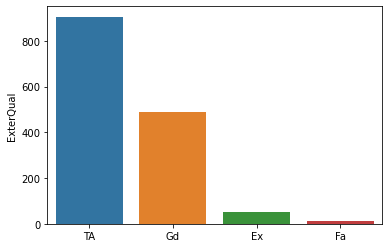

In [9]:
### Tulis kode Anda di sini

sns.barplot(x=house_categorical.ExterQual.value_counts().index,
            y=house_categorical.ExterQual.value_counts())
plt.show()

#### **Analisis tentang variabel kategorikal**

   * Lebih banyak jumlah rumah dengan `Utilities` AllPub (air, listrik, gas, dan pembuangan air) dibandingkan dengan rumah yang hanya memiliki fasilitas listrik dan gas atau NoSeWa
   * Jumlah dengan `HouseStyle` terbanyak ditemukan pada 1Story, lalu diikuti dengan 2Story, 1.5Fin, SLvl, SFoyer, 1.5Unf, 2.5Unf, dan 2.5Fin
   * Jumlah dengan `ExterQuality` terbanyak terdapat pada TA, Gd, Ex, dan Fa

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Mean: 180921.19589041095
Median: 163000.0
Std Dev: 79442.50288288663


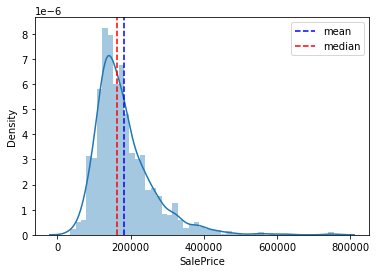

In [10]:
### Tulis kode Anda di sini

print('Mean:', house_numerical['SalePrice'].mean())
print('Median:', np.median(house_numerical['SalePrice']))
print('Std Dev:', house_numerical['SalePrice'].std())

sns.distplot(house_numerical['SalePrice'], axlabel='SalePrice')

line1 = plt.axvline(house_numerical['SalePrice'].mean(), color='b', linestyle='--', label='mean')
line2 = plt.axvline(np.median(house_numerical['SalePrice']), color='r', linestyle='--', label='median')

first_legend = plt.legend(handles=[line1, line2], loc=1)
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* Bentuk grafik *skewed right* dikarenakan adanya *outlier* atau lebarnya rentang harga rumah
* Nilai *median* dan *mean* dari `SalePrice` tidak jauh berbeda
* Rumah dengan rentang harga antara 100000-200000 memiliki jumlah terbanyak
* Standar deviasi yang besar menjelaskan menyebarnya rentang data `SalePrice`

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Mean: 1515.463698630137
Median: 1464.0
Std Dev: 525.4803834232027


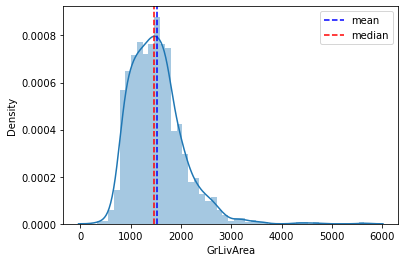

In [57]:
### Tulis kode Anda di sini

print('Mean:', house_numerical['GrLivArea'].mean())
print('Median:', np.median(house_numerical['GrLivArea']))
print('Std Dev:', house_numerical['GrLivArea'].std())

sns.distplot(house_numerical['GrLivArea'], axlabel='GrLivArea')

line1 = plt.axvline(house_numerical['GrLivArea'].mean(), color='b', linestyle='--', label='mean')
line2 = plt.axvline(np.median(house_numerical['GrLivArea']), color='r', linestyle='--', label='median')

first_legend = plt.legend(handles=[line1, line2], loc=1)
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* Bentuk grafik *skewed right* dikarenakan adanya *outlier* atau lebarnya luas area tinggal
* Nilai *median* dan *mean* dari `GrlivArea` tidak jauh berbeda
* Luas area tinggal dengan jumlah terbanyak berada pada rentang 1000-1500 *square feet*
* Standar deviasi yang lumayan kecil menjelaskan menyebarnya rentang data `GrlivArea`

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

Mean: 472.9801369863014
Median: 480.0
Std Dev: 213.80484145338076


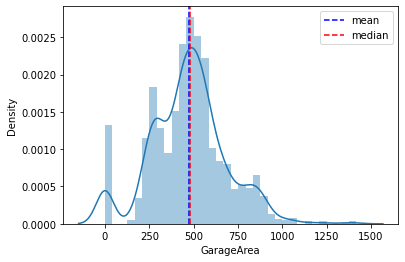

In [58]:
### Tulis kode Anda di sini

print('Mean:', house_numerical['GarageArea'].mean())
print('Median:', np.median(house_numerical['GarageArea']))
print('Std Dev:', house_numerical['GarageArea'].std())

sns.distplot(house_numerical['GarageArea'], axlabel='GarageArea')

line1 = plt.axvline(house_numerical['GarageArea'].mean(), color='b', linestyle='--', label='mean')
line2 = plt.axvline(np.median(house_numerical['GarageArea']), color='r', linestyle='--', label='median')

first_legend = plt.legend(handles=[line1, line2], loc=1)
plt.show()

#### **Analisis tentang variabel `GarageArea`**

* Bentuk grafik *bimodal* dikarenakan adanya rumah yang tidak memiliki area garasi
* Nilai *median* dan *mean* dari `GarageArea` tidak jauh berbeda yang menyebabkan garis berhimpitan
* Luas garasi dengan jumlah terbanyak berada pada rentang 400-600 *square feet*

## Pemrosesan Data

Mean: 5.257489449773029
Median: 5.212187604403958
Std Dev: 4.9000529184065496


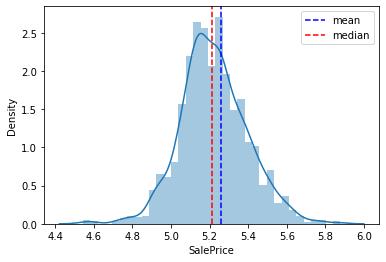

In [17]:
# Transformasi log-10 SalePrice

### Tulis kode Anda di sini

print('Mean:', np.log10(house_numerical['SalePrice'].mean()))
print('Median:', np.log10(np.median(house_numerical['SalePrice'])))
print('Std Dev:', np.log10(house_numerical['SalePrice'].std()))

sns.distplot(np.log10(house_numerical['SalePrice']), axlabel='SalePrice')

line1 = plt.axvline(np.log10(house_numerical['SalePrice'].mean()), color='b', linestyle='--', label='mean')
line2 = plt.axvline(np.log10(np.median(house_numerical['SalePrice'])), color='r', linestyle='--', label='median')

first_legend = plt.legend(handles=[line1, line2], loc=1)
plt.show()

Mean: 3.1563543103897764
Median: 3.165541076722373
Std Dev: 2.720556508128158


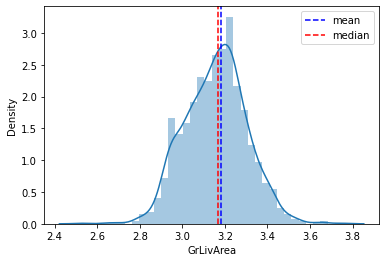

In [26]:
# Transformasi log-10 GrLivArea

### Tulis kode Anda di sini

print('Mean:', np.log10(house_numerical['GrLivArea']).mean())
print('Median:', np.log10(np.median(house_numerical['GrLivArea'])))
print('Std Dev:', np.log10(house_numerical['GrLivArea'].std()))

sns.distplot(np.log10(house_numerical['GrLivArea']), axlabel='GrLivArea')

line1 = plt.axvline(np.log10(house_numerical['GrLivArea'].mean()), color='b', linestyle='--', label='mean')
line2 = plt.axvline(np.log10(np.median(house_numerical['GrLivArea'])), color='r', linestyle='--', label='median')

first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

Mean: 500.76214648295866
Median: 484.0
Std Dev: 185.68051979433156


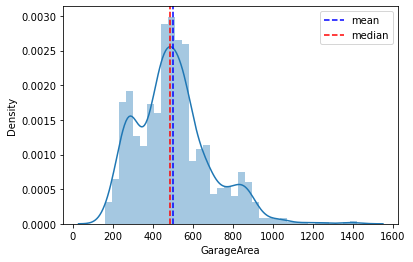

In [38]:
# Menghilangkan nilai nol pada GarageArea

### Tulis kode Anda di sini

house_num = house_numerical[house_numerical != 0]

print('Mean:', house_num['GarageArea'].mean())
print('Median:', house_num.GarageArea.median())
print('Std Dev:', house_num['GarageArea'].std())

sns.distplot(house_num['GarageArea'], axlabel='GarageArea')

line1 = plt.axvline(house_num['GarageArea'].mean(), color='b', linestyle='--', label='mean')
line2 = plt.axvline(house_num.GarageArea.median(), color='r', linestyle='--', label='median')

#plt.xlim([0,1600])
first_legend = plt.legend(handles=[line1, line2], loc=1)
plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

* Pada `SalePrice` dan `GrLivArea` diperlukan transformasi log10 dikarenakan angka yang terlalu besar
* Setelah transformasi, grafik `SalePrice` dan `GrLivArea` tidak terlalu *skewed*
* Standar deviasi yang dihasilkan `SalePrice` dan `GrLivArea` kecil sehingga nilai *mean* dan *median* tidak jauh berbeda
* Menghilangkan nilai 0 pada grafik `GarageArea` dapat menghilangkan puncak grafik *bimodal*

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

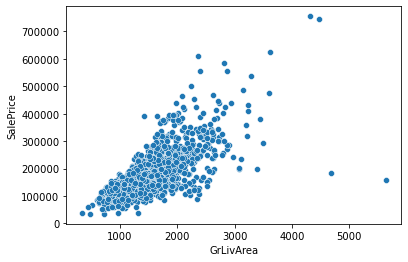

In [39]:
ax = sns.scatterplot(house_numerical['GrLivArea'],house_numerical['SalePrice'])

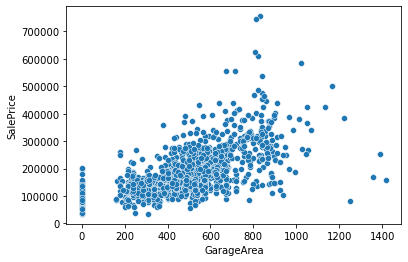

In [40]:
ax = sns.scatterplot(house_numerical['GarageArea'],house_numerical['SalePrice'])

#### **Hipotesis tentang hubungan antar-variabel**

* Semakin besar luas area tinggal, harga rumah semakin tinggi
* Semakin tinggi luas garasi, harga rumah semakin tinggi